### 생선 분류 - 최적의 K 찾기 : 하이퍼파라미터
- 데이터 셋 : fish.csv
- 피쳐/특성 : Weight, Length
- 타겟/라벨 : Species
- 학습 방법 : 지도학습 => 분류
- 알고리즘  : 최근접 이웃 알고리즘
- 하이퍼 파라미터 튜닝 : 모델 성능 개선

[1] 데이터 준비

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
Data_File = '../Data/fish.csv'

# 행 : Bream, Smelt, 컬럼 : Species, Weight, Length => 0, 1, 2
fish = pd.read_csv(Data_File, usecols=[0,1,2])
fish

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [67]:
mask = (fish['Species'] == 'Bream') | (fish['Species'] == 'Smelt')
two_fish = fish[mask]
two_fish.reset_index(drop=True, inplace=True)
two_fish.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [68]:
# Species 컬럼을 수치화
name_dict = {name : idx + 1 for idx, name in enumerate(two_fish['Species'].unique())}
name_dict

{'Bream': 1, 'Smelt': 2}

In [69]:
two_fish.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [70]:
two_fish = two_fish.copy()
two_fish['fish_code'] = two_fish['Species'].replace(name_dict).to_list()
two_fish

,Species,Weight,Length,fish_code
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1
2,Bream,340.0,26.5,1
3,Bream,363.0,29.0,1
4,Bream,430.0,29.0,1
5,Bream,450.0,29.7,1
6,Bream,500.0,29.7,1
7,Bream,390.0,30.0,1
8,Bream,450.0,30.0,1
9,Bream,500.0,30.7,1


[3] 피쳐와 타겟 분리

In [71]:
features = two_fish[['Weight', 'Length']]
target = two_fish['fish_code']
print(f'feature => {features.shape}, {features.ndim}D')
print(f'target  => {target.shape}, {target.ndim}D')

feature => (49, 2), 2D
target  => (49,), 1D


[3] 데이터셋 준비 => 학습용, 테스트용

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# train : test = 80 : 20 ==> train_size = 0.8 또는 test_size = 0.2
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율을 고려
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8,
                                                    stratify=target)

In [74]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')

print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (39, 2), 2D
y_train : (39,), 1D
X_test : (10, 2), 2D
y_test : (10,), 1D


In [75]:
# target 0(Bream), 1(Smelt)의 비율
y_train.value_counts() / y_train.count()

fish_code
1    0.717949
2    0.282051
Name: count, dtype: float64

In [76]:
y_test.value_counts() / y_test.count()

fish_code
1    0.7
2    0.3
Name: count, dtype: float64

[3-2] 피쳐 스케일링

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()

In [79]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행
mmScaler.fit(X_train)

MinMaxScaler()

In [80]:
mmScaler.min_, mmScaler.data_min_, mmScaler.scale_, mmScaler.data_max_
# 정규화된 최소값, 최소값, 정규화된 최대값, 최대값

(array([-0.00674519, -0.31410256]),
 array([6.7, 9.8]),
 array([0.00100675, 0.03205128]),
 array([1000.,   41.]))

In [81]:
# 학습용 데이터셋 ==> 스케일링
X_train_scaled = mmScaler.transform(X_train)
X_train_scaled.shape, X_train_scaled.min(), X_train_scaled.max()

((39, 2), 0.0, 1.0000000000000002)

In [82]:
X_test_scaled = mmScaler.transform(X_test)
X_test.shape, X_test_scaled.min(), X_test_scaled.max()

((10, 2), 0.003120910097654284, 0.9546964663243734)

[4] 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습 진행 => fit()

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_jobs=-1)

In [85]:
# 학습 후 모델 파라미터
model.classes_, model.n_samples_fit_
# model.feature_names_in_ <== ndarray일 경우 컬럼명 X

(array([1, 2]), 39)

[5] 모델 성능평가 ==> score() 메서드 + 테스트 데이터셋

In [86]:
model.score(X_test_scaled, y_test)

1.0

[6] 최적의 K 개수 찾기 ==> 모델의 성능 영향 미치는 파라미터
- 하이퍼 파라미터

In [87]:
len(X_train)

39

In [88]:
# K의 범위 : 1 ~ 전체 데이터 개수

scores, points = [], []

for k in range(1, 40):
    # 최근접 이웃 데이터 수 설정
    model.n_neighbors = k

    # 모델 예측 값 추출
    model.fit(X_train_scaled, y_train)

    # 점수 계산
    jumsu = model.score(X_test_scaled, y_test)
    # print(f"[{k}] jumsu => {jumsu}")

    if k > 1:
        if jumsu != scores[-1]: points.append(k)

    scores.append(jumsu)

In [89]:
points

[22]

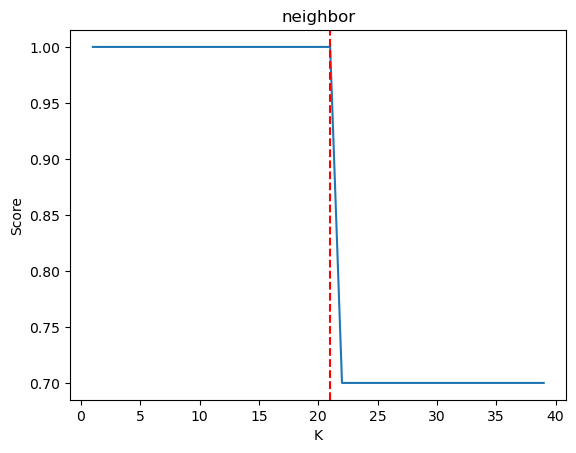

In [90]:
# x축 k, y축 점수
plt.plot(range(1, 40), scores)
plt.xlabel('K')
plt.ylabel('Score')
plt.title('neighbor')
plt.axvline(points[0]-1, 0.0, 1.0, color = 'red', linestyle = '--')
plt.show()

[7] 예측하기 ==> 학습/훈련과 테스트에 사용되지 않은 데이터를 사용
- 주의 : 입력 데이터 ==> 2D

In [91]:
new_data = pd.DataFrame([[413, 27.8]], columns=two_fish.columns[1:3])
new_data

,Weight,Length
0,413,27.8


In [92]:
mmScaler.data_range_, mmScaler.transform(new_data)

(array([993.3,  31.2]), array([[0.40904057, 0.57692308]]))

In [93]:
scaled_new_data = mmScaler.transform(new_data)

In [94]:
model.predict(scaled_new_data)

array([1])

In [95]:
distance, indexes = model.kneighbors(scaled_new_data)

In [96]:
distance

array([[0.04209753, 0.06334927, 0.07138647, 0.07974703, 0.08448221,
        0.10667685, 0.12006426, 0.1277142 , 0.13487345, 0.14742788,
        0.15337025, 0.18855758, 0.23143819, 0.23143819, 0.25707598,
        0.29923871, 0.33355916, 0.33834045, 0.35427164, 0.36978152,
        0.38571904, 0.38976413, 0.4011259 , 0.57002596, 0.61493269,
        0.62276118, 0.63743027, 0.64250685, 0.64901627, 0.65390537,
        0.65396783, 0.66044108, 0.66734496, 0.67438368, 0.68627917,
        0.68648846, 0.68855791, 0.70647952, 0.70721597]])

In [97]:
indexes

array([[ 1, 13, 23, 22,  0, 21,  9, 38, 25, 16, 10, 32,  7,  3, 28, 11,
        17, 14, 18,  5,  2, 29, 24, 35, 26, 34, 15, 20, 19,  6, 31, 30,
        12, 36,  8, 27, 33, 37,  4]])

In [98]:
neighbors = indexes.reshape(-1).tolist()
neighbors

[1,
 13,
 23,
 22,
 0,
 21,
 9,
 38,
 25,
 16,
 10,
 32,
 7,
 3,
 28,
 11,
 17,
 14,
 18,
 5,
 2,
 29,
 24,
 35,
 26,
 34,
 15,
 20,
 19,
 6,
 31,
 30,
 12,
 36,
 8,
 27,
 33,
 37,
 4]

In [99]:
[i[0] for i in X_train_scaled[neighbors]]

[0.4261552401087285,
 0.35870331219168433,
 0.4462901439645626,
 0.4462901439645626,
 0.3355481727574751,
 0.49662740360414787,
 0.47145877378435525,
 0.49662740360414787,
 0.49662740360414787,
 0.49662740360414787,
 0.3355481727574751,
 0.2368871438638881,
 0.5973019228833184,
 0.5973019228833184,
 0.5721332930635258,
 0.6174368267391525,
 0.6979764421624888,
 0.6828752642706133,
 0.6778415383066547,
 0.6979764421624888,
 0.7181113460183229,
 0.7231450719822814,
 0.7120708748615727,
 0.013289036544850499,
 0.9194603845766638,
 0.005537098560354374,
 0.9244941105406224,
 0.005537098560354374,
 0.003120910097654284,
 0.0033222591362126247,
 0.0032215846169334544,
 1.0000000000000002,
 0.002013490385583408,
 0.003020235578375114,
 0.00030202355783751165,
 0.949662740360415,
 0.0008053961542333638,
 0.9748313701802076,
 0.0]

In [100]:
k_weight = X_train_scaled[neighbors][:,0]
k_length = X_train_scaled[neighbors][:,1]

k_weight, k_length

(array([4.26155240e-01, 3.58703312e-01, 4.46290144e-01, 4.46290144e-01,
        3.35548173e-01, 4.96627404e-01, 4.71458774e-01, 4.96627404e-01,
        4.96627404e-01, 4.96627404e-01, 3.35548173e-01, 2.36887144e-01,
        5.97301923e-01, 5.97301923e-01, 5.72133293e-01, 6.17436827e-01,
        6.97976442e-01, 6.82875264e-01, 6.77841538e-01, 6.97976442e-01,
        7.18111346e-01, 7.23145072e-01, 7.12070875e-01, 1.32890365e-02,
        9.19460385e-01, 5.53709856e-03, 9.24494111e-01, 5.53709856e-03,
        3.12091010e-03, 3.32225914e-03, 3.22158462e-03, 1.00000000e+00,
        2.01349039e-03, 3.02023558e-03, 3.02023558e-04, 9.49662740e-01,
        8.05396154e-04, 9.74831370e-01, 0.00000000e+00]),
 array([0.61538462, 0.61538462, 0.63782051, 0.6474359 , 0.53525641,
        0.63782051, 0.67948718, 0.66987179, 0.67948718, 0.69551282,
        0.71153846, 0.5       , 0.71153846, 0.71153846, 0.77564103,
        0.79166667, 0.74358974, 0.77564103, 0.80769231, 0.80769231,
        0.80769231, 0.

In [101]:
scaled_new_data[0][1]

0.5769230769230771

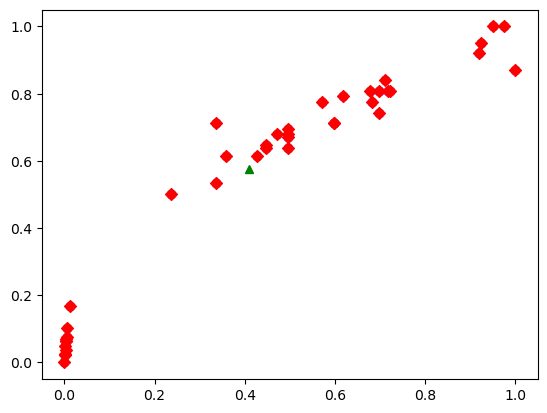

In [102]:
# 도미(Bream), 빙어(Smelt)에 대한 시각화 ==> 2개 피쳐 Weight, Length로 Bream, Smelt 분류 가능함
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], color = 'blue')
# plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], color = 'blue')

plt.scatter(k_weight, k_length, color = 'red', marker = 'D')

plt.plot(scaled_new_data[0][0], scaled_new_data[0][1], color = 'g', marker = '^')

plt.show()